In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
np.random.seed(10)

In [2]:
#使用正規表示式Regular Expression
#建立rm_tag函數移除文字中html tag
import re                          #匯入Regular Expression模組
def rm_tags(text):                 #建立rm_tags函數，輸入參數text文字
    re_tag = re.compile(r'<[^>]+>')#建立rm_tag正規表示式變數為'<[^>]+>'
    return re_tag.sub('',text)     #使用re_tag將text文字中，符合正規表示式條件的字替換成空字串

In [3]:
#建立read_files函數讀取IMDb檔案目錄
import os
def read_files(filetype):             #建立read_files函數，輸入參數filetype 讀取[訓練/測試]資料會傳入"[train/test]" 
    path = "C:/Users/USER/aclImdb/"   #設定存取路徑
    file_list=[]                      #建立檔案list
    
    positive_path = path + filetype + "/pos/"  #設定正面評價的檔案目錄為positive_path
    for f in os.listdir(positive_path):         #使用for將positive_path目錄下所有的檔案加入file_list
        file_list +=[positive_path + f]
    
    negative_path = path + filetype + "/neg/"  #設定正面評價的檔案目錄為negative_path
    for f in os.listdir(negative_path):         #使用for將negative_path目錄下所有的檔案加入file_list
        file_list +=[negative_path + f]
    
    print('read',filetype,'files:',len(file_list)) #顯示目前讀取的filetype("train或test")，目錄下的檔案個數
    
    all_labels = ([1]*12500+[0]*12500)             #產生all_label因為前12500筆是正面，所以產生12500筆1的list，0則為負面
    
    all_texts = []            #設定all_text為空list
    for fi in file_list:   #fi讀取所有file_list檔案
        with open(fi,encoding='utf-8') as file_input: #使用open(fi,encoding='utf-8')開啟檔案為file_input
#使用使用 file_input.readlines()讀取檔案，並使用join連接所有檔案內容，然後使用rm_tags移除tag，最後加入 all_texts list
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
  
    return all_labels,all_texts

In [4]:
#讀取IMDb資料及目錄
y_train,train_text = read_files("train")

read train files: 25000


In [5]:
#讀取測試資料
y_test,test_text = read_files("test")

read test files: 25000


In [6]:
#建立Token
#建立Token
token = Tokenizer(num_words=3800) #使用Tokenizer建立token，輸入參數num_words=3800，也就是建立2000個字的字典
token.fit_on_texts(train_text)    #讀取所有的訓練資料影評，依照每個英文字，在影評中出現的次數進行排序，排序的前2000個會列入字典中

In [7]:
#使用token.texts_to_sequences將訓練資料與測試資料的影評文字轉換籌數字list。
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq = token.texts_to_sequences(test_text)

In [8]:
#使用sequence.pad_sequences()方法截長補短
x_train = pad_sequences(x_train_seq,maxlen=380)
x_test = pad_sequences(x_test_seq,maxlen=380)

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers import Embedding
from keras.layers import LSTM

In [10]:
#建立模型
model = Sequential()

In [11]:
#將Embedding加入模型
model.add(Embedding(output_dim = 32,    #輸出的維度32 希望把「數字list」換為32維度的向量
                    input_dim = 3800,   #輸入的維度是3800，因為之前建立的字典是3800字
                    input_length = 380  #「數字list」每一筆有380個數字 所以長度為380
                   ))
model.add(Dropout(0.2)) #每次訓練迭代時，隨機在神經往綠中放棄35%的神經元

In [12]:
#加入LSTM層
model.add(LSTM(32))

In [13]:
#加入隱藏層
model.add(Dense(
    units=256,        #隱藏層共有256個神經元
    activation='relu'
))

model.add(Dropout(0.2))

In [14]:
#加入輸出層
model.add(Dense(
    units = 1,    #輸出層只有一個神經元，1代表正面評價，0代表負面評價
    activation = 'sigmoid'
))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 380, 32)           121600    
                                                                 
 dropout (Dropout)           (None, 380, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 138,625
Trainable params: 138,625
Non-trai

In [16]:
#定義訓練方式
model.compile(
    loss='binary_crossentropy', #在深度學習使用cross_entropy，訓練效果比較好
    optimizer = 'adam',
    metrics=['accuracy']
)

In [17]:
y_train = np.array(y_train)
y_test=np.array(y_test)

In [18]:
#開始訓練

train_history = model.fit(x_train,              #feature(「數字list」)
                          y_train,              #測試資料的標籤label(正向:1、負向:0)
                          batch_size = 100,
                          epochs = 10,
                          verbose = 2,
                          validation_split = 0.2
                         )

Epoch 1/10
200/200 - 29s - loss: 0.4840 - accuracy: 0.7576 - val_loss: 0.2835 - val_accuracy: 0.8736 - 29s/epoch - 147ms/step
Epoch 2/10
200/200 - 26s - loss: 0.2698 - accuracy: 0.8917 - val_loss: 0.6175 - val_accuracy: 0.7354 - 26s/epoch - 128ms/step
Epoch 3/10
200/200 - 26s - loss: 0.2295 - accuracy: 0.9104 - val_loss: 0.3797 - val_accuracy: 0.8202 - 26s/epoch - 128ms/step
Epoch 4/10
200/200 - 25s - loss: 0.2097 - accuracy: 0.9200 - val_loss: 0.7301 - val_accuracy: 0.7038 - 25s/epoch - 126ms/step
Epoch 5/10
200/200 - 25s - loss: 0.1882 - accuracy: 0.9290 - val_loss: 0.4795 - val_accuracy: 0.8190 - 25s/epoch - 125ms/step
Epoch 6/10
200/200 - 25s - loss: 0.1750 - accuracy: 0.9332 - val_loss: 0.6187 - val_accuracy: 0.7990 - 25s/epoch - 125ms/step
Epoch 7/10
200/200 - 25s - loss: 0.1586 - accuracy: 0.9390 - val_loss: 0.5112 - val_accuracy: 0.8190 - 25s/epoch - 124ms/step
Epoch 8/10
200/200 - 25s - loss: 0.1516 - accuracy: 0.9428 - val_loss: 0.4219 - val_accuracy: 0.8474 - 25s/epoch - 124

In [19]:
#讀取train_history
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation): #匯入之前訓練產生的train_history/訓練資料的執行結果/驗證資料的執行結果
    plt.plot(train_history.history[train])              #訓練資料的執行結果畫線
    plt.plot(train_history.history[validation])         #驗證資料的執行結果
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

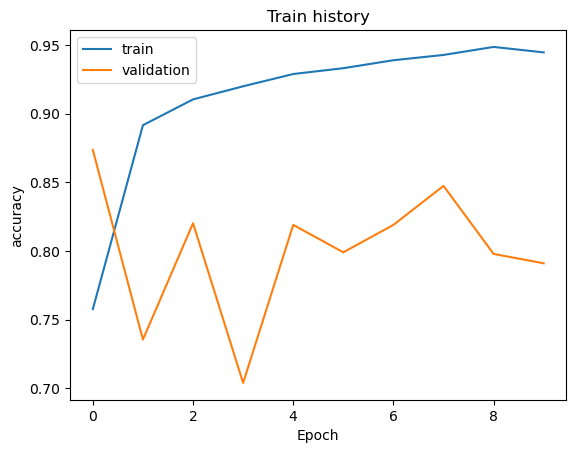

In [20]:
#呼叫執行結果
show_train_history(train_history,'accuracy','val_accuracy')

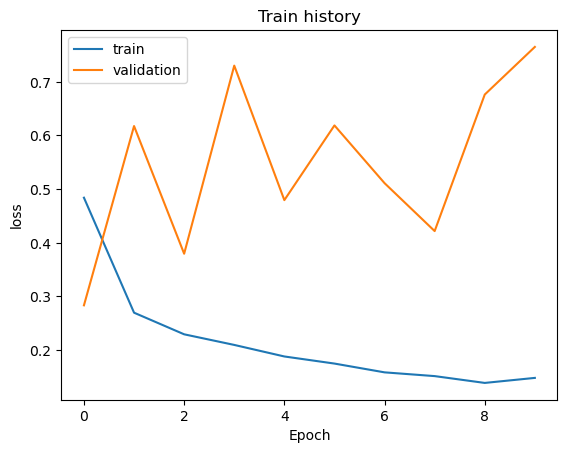

In [21]:
#loss誤差執行結果
show_train_history(train_history,'loss','val_loss')

In [23]:
#評估模型準確率
scores = model.evaluate(x_test,y_test,verbose = 1,batch_size=1)
scores[1]

25000/25000 [==============================] - 335s 13ms/step - loss: 0.5176 - accuracy: 0.8528


0.852840006351471

In [24]:
#預測機率
probility = model.predict(x_test) #使用model.predict_classes進行預測
#classes_x=np.argmax(prediction,axis=1)

782/782 [==============================] - 24s 31ms/step


In [26]:
probility[:10]

array([[0.9999417 ],
       [0.9985425 ],
       [0.9879657 ],
       [0.99914056],
       [0.9941863 ],
       [0.9980869 ],
       [0.99651706],
       [0.95887077],
       [0.9986702 ],
       [0.9997658 ]], dtype=float32)

In [27]:
for p in probility[12500:12510]:
    print(p)

[0.05040307]
[0.00830933]
[0.00342558]
[0.7454324]
[0.999563]
[0.01010787]
[0.04384518]
[0.00077418]
[0.00633865]
[0.03197946]


In [28]:
#預測結果
prediction = model.predict(x_test) #使用model.predict_classes進行預測
classes_x = np.round(prediction).astype(int)

782/782 [==============================] - 25s 31ms/step


In [29]:
classes_x[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [30]:
classes_x.shape

(25000, 1)

In [31]:
classes_x=classes_x.reshape(25000)
classes_x

array([1, 1, 1, ..., 0, 0, 1])

In [32]:
SentimentDict={1:'正面的',0:'負面的'}
def display_test_Sentiment(i):
    print(test_text[i])
    print('label真實值:',SentimentDict[y_test[i]],
          '預測結果:',SentimentDict[classes_x[i]])

In [33]:
display_test_Sentiment(2)

As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's sensitivity to the issues of class in golf in the early twentieth century. The movie depicted well the psychological battles that Harry Vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that glass ceiling that prevents him from being accepted as an equal in English golf society. Likewise, the young Ouimet goes through his own class struggles, being a mere caddie in the eyes of the upper crust Americans who scoff at his attempts to rise above his standing. What I loved best, however, is how this theme of class is manifested in the characters of Ouimet's parents. His father is a working-class drone who sees the value of hard work but is intimidated by the upper class; his mother, however, recognizes her son's talent and desire and encourages him to pursue his dream of competing against those who think he is inferior.Finally, the golf scenes

In [34]:
display_test_Sentiment(3)

I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creative, the acting is good, and the story is fabulous. If this movie does not do well, it won't be because it doesn't deserve to. Before this film, I didn't realize how charming Shia Lebouf could be. He does a marvelous, self-contained, job as the lead. There's something incredibly sweet about him, and it makes the movie even better. The other actors do a good job as well, and the film contains moments of really high suspense, more than one might expect from a movie about golf. Sports movies are a dime a dozen, but this one stands out. This is one I'd recommend to anyone.
label真實值: 正面的 預測結果: 正面的


In [35]:
classes_x[12500:12510]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [38]:
display_test_Sentiment(12500)

Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.
label真實值: 負面的 預測結果: 負面的


In [43]:
input_text='''
Oh dear, oh dear, oh dear: where should I start folks. I had low expectations already because I hated each and every single trailer so far, but boy did Disney make a blunder here. I'm sure the film will still make a billion dollars - hey: if Transformers 11 can do it, why not Belle? - but this film kills every subtle beautiful little thing that had made the original special, and it does so already in the very early stages. It's like the dinosaur stampede scene in Jackson's King Kong: only with even worse CGI (and, well, kitchen devices instead of dinos).
The worst sin, though, is that everything (and I mean really EVERYTHING) looks fake. What's the point of making a live-action version of a beloved cartoon if you make every prop look like a prop? I know it's a fairy tale for kids, but even Belle's village looks like it had only recently been put there by a subpar production designer trying to copy the images from the cartoon. There is not a hint of authenticity here. Unlike in Jungle Book, where we got great looking CGI, this really is the by-the-numbers version and corporate filmmaking at its worst. Of course it's not really a "bad" film; those 200 million blockbusters rarely are (this isn't 'The Room' after all), but it's so infuriatingly generic and dull - and it didn't have to be. In the hands of a great director the potential for this film would have been huge.
Oh and one more thing: bad CGI wolves (who actually look even worse than the ones in Twilight) is one thing, and the kids probably won't care. But making one of the two lead characters - Beast - look equally bad is simply unforgivably stupid. No wonder Emma Watson seems to phone it in: she apparently had to act against an guy with a green-screen in the place where his face should have been. 
'''

In [44]:
#將影評轉換成數字list
input_seq = token.texts_to_sequences([input_text])

In [45]:
#查看數字list
print(input_seq[0])

[445, 3219, 445, 3219, 445, 3219, 117, 140, 9, 376, 1585, 9, 65, 360, 1394, 454, 83, 9, 1795, 253, 2, 171, 682, 1469, 34, 226, 17, 426, 118, 909, 93, 3, 129, 142, 248, 1, 18, 76, 127, 93, 3, 2501, 1400, 44, 1498, 66, 78, 8, 134, 20, 17, 10, 18, 1093, 171, 1303, 303, 113, 151, 11, 65, 89, 1, 200, 314, 2, 8, 123, 34, 454, 7, 1, 51, 398, 41, 36, 1, 132, 7, 704, 1985, 60, 15, 56, 429, 1679, 2, 69, 300, 4, 1, 245, 3078, 147, 6, 11, 282, 2, 9, 378, 62, 282, 268, 1215, 799, 1, 209, 4, 227, 3, 408, 202, 306, 4, 3, 2756, 1068, 44, 21, 93, 171, 164, 36, 3, 9, 120, 41, 3, 2452, 780, 14, 358, 17, 56, 2053, 268, 36, 8, 65, 60, 1028, 73, 272, 46, 30, 3, 361, 265, 5, 1034, 1, 1211, 35, 1, 1068, 46, 6, 20, 3, 3158, 4, 129, 1021, 7, 2685, 270, 117, 71, 184, 84, 263, 1679, 10, 62, 6, 1, 30, 1, 1390, 306, 2, 29, 90, 245, 4, 261, 41, 20, 62, 3, 75, 18, 144, 1427, 1706, 22, 10, 214, 1051, 99, 28, 17, 41, 34, 2, 749, 2, 8, 156, 24, 5, 25, 7, 1, 952, 4, 3, 84, 163, 1, 982, 14, 10, 18, 58, 24, 73, 662, 445, 2

In [46]:
#查看list長度
len(input_seq[0])

297

In [47]:
#將list截取長度為380
pad_input_seq = pad_sequences(input_seq,maxlen=380)

In [48]:
len(pad_input_seq[0])

380

In [49]:
predict_result = model.predict(pad_input_seq)
classes_x = np.round(predict_result).astype(int)

1/1 [==============================] - 0s 32ms/step


In [50]:
classes_x

array([[0]])

In [51]:
classes_x[0][0]

0

In [52]:
SentimentDict[classes_x[0][0]]

'負面的'

In [53]:
#把命令全部整理成predict_review()函數
def predict_review(input_text):
    input_seq = token.texts_to_sequences([input_text])
    pad_input_seq = pad_sequences(input_seq,maxlen=100)
    predict_result = model.predict(pad_input_seq)
    classes_x = np.round(predict_result).astype(int)
    print(SentimentDict[classes_x[0][0]])

In [54]:
predict_review('''
It's hard to believe that the same talented director who made the influential cult action classic The Road Warrior had anything to do with this disaster.
Road Warrior was raw, gritty, violent and uncompromising, and this movie is the exact opposite. It's like Road Warrior for kids who need constant action in their movies.
This is the movie. The good guys get into a fight with the bad guys, outrun them, they break down in their vehicle and fix it. Rinse and repeat. The second half of the movie is the first half again just done faster.
The Road Warrior may have been a simple premise but it made you feel something, even with it's opening narration before any action was even shown. And the supporting characters were given just enough time for each of them to be likable or relatable.
In this movie there is absolutely nothing and no one to care about. We're supposed to care about the characters because... well we should. George Miller just wants us to, and in one of the most cringe worthy moments Charlize Theron's character breaks down while dramatic music plays to try desperately to make us care.
Tom Hardy is pathetic as Max. One of the dullest leading men I've seen in a long time. There's not one single moment throughout the entire movie where he comes anywhere near reaching the same level of charisma Mel Gibson did in the role. Gibson made more of an impression just eating a tin of dog food. I'm still confused as to what accent Hardy was even trying to do.
I was amazed that Max has now become a cartoon character as well. Gibson's Max was a semi-realistic tough guy who hurt, bled, and nearly died several times. Now he survives car crashes and tornadoes with ease?
In the previous movies, fuel and guns and bullets were rare. Not anymore. It doesn't even seem Post-Apocalyptic. There's no sense of desperation anymore and everything is too glossy looking. And the main villain's super model looking wives with their perfect skin are about as convincing as apocalyptic survivors as Hardy's Australian accent is. They're so boring and one-dimensional, George Miller could have combined them all into one character and you wouldn't miss anyone.
Some of the green screen is very obvious and fake looking, and the CGI sandstorm is laughably bad. It wouldn't look out of place in a Pixar movie.
There's no tension, no real struggle, or any real dirt and grit that Road Warrior had. Everything George Miller got right with that masterpiece he gets completely wrong here. 
''')

1/1 [==============================] - 0s 360ms/step
負面的


In [55]:
predict_review('''
Sure, I'm a huge film snob who (on the surface) only likes artsy-fartsy foreign films from before the 60's, but that hasn't stopped me from loving Disney's Beauty & The Beast; in fact, it's probably my favorite American animated film and is easily Disney's finest work. It's beautiful, it's breathtaking, it's warm, it's hilarious, it's captivating, and, in Disney fashion, it's magical. When I learned that Disney would be remaking their classic films, B&TB was undeniably the best wrapped package. How could they go wrong?
Oh man, they went wrong.
First thing's first: this film is so flat. The directing was dull and uninteresting throughout the entire film and it honestly felt like one of the Twilight sequels...and then I looked it up and found out that, yes, director Bill Condon was the man behind Breaking Dawn parts 1 & 2. Every shot looks bored and uninterested, which contrasts heavily with the original animated film that was constantly popping with vibrancy. The script too is boring because it's almost a complete remake of the original, though I guess most people won't mind that.
Next: the CGI is horrid. Although I didn't care for The Jungle Book from last year, I could at least admit that the CGI was breathtaking. The same cant be said for this film. Characters like Lumière, Cogsworth, Mrs Potts, and most of the cursed appliances have very strange, lifeless faces that are pretty off putting to be looking at for such a long time. All of the sets too look artificial and fake, especially the town towards the beginning. However, the biggest offender is easily and infuriatingly the character that mattered most: The Beast. The CGI on the Beast's face is so distracting that it completely takes you out of the film. His eyes are completely devoid of soul, and his mouth is a gaping video game black hole of fiction. Klaus Kinski looked much better in the Faerie Tale Theatre episode of Beauty & The Beast, and that was a 1984 TV show episode. But do you know why it looked better? Because it was an actual face with actual eyes, not some video game computerized synthetic monstrosity. When will studios learn that practical effects will always top CGI?
Finally: wasted casting. Emma Watson is beautiful, but she's no Belle. She is completely devoid of the warmth and humanity that made the animated Belle so beloved. Instead, she is cold and heartless throughout most of the film. Kevin Kline is 100% wasted and does nothing except look old. Ian McKellan, Ewan McGregor, Emma Thompson, and even Dan Stevens as the Beast are very expendable and could've been played by anyone else. The only good characters are Gaston and LeFou, mostly because they are fun and played by actors who breathe new life into their original shapes. If anything, this film should've been about Gaston and LeFou, but that would never happen because that would mean Disney couldn't cater to blind nostalgic 90's kids.
Overall, this film is a complete bore. It could've been better if even the special effects were good, but the CGI in particular is horrendous. I'm all for Disney remaking their nostalgia- catering 90's films, but they need to be interesting. This film, sadly, is not. Even the Christmas sequel is better than this film because it's at least something. 
''')

1/1 [==============================] - 0s 23ms/step
負面的
